In [221]:
import numpy as np
import pandas as pd
import scipy as sci
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objects as go
pyo.init_notebook_mode()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [197]:
#gather data
path = "C:/Users/brendo/Downloads/"
df_cal = pd.read_csv(path+"calendar.csv")
df_list = pd.read_csv(path+"listings.csv")
df_reviews = pd.read_csv(path+"reviews.csv")

In [198]:
#assess data

#### df calendar links listing_id to date listed, available (t/f), & price
#### df listing links id (listing_id) to all details regarding listing
#### df reviews lists reviews, contains listing id

In [199]:
def nan_features(df):  
    features_with_nan = [features for features in df.columns if df[features].isnull().sum()>=1]
    for features in features_with_nan:
        print(features, np.round(df[features].isnull().mean(),2), '% missing values')

nan_features(df_list)

summary 0.05 % missing values
space 0.15 % missing values
neighborhood_overview 0.27 % missing values
notes 0.42 % missing values
transit 0.24 % missing values
thumbnail_url 0.08 % missing values
medium_url 0.08 % missing values
xl_picture_url 0.08 % missing values
host_name 0.0 % missing values
host_since 0.0 % missing values
host_location 0.0 % missing values
host_about 0.22 % missing values
host_response_time 0.14 % missing values
host_response_rate 0.14 % missing values
host_acceptance_rate 0.2 % missing values
host_is_superhost 0.0 % missing values
host_thumbnail_url 0.0 % missing values
host_picture_url 0.0 % missing values
host_neighbourhood 0.08 % missing values
host_listings_count 0.0 % missing values
host_total_listings_count 0.0 % missing values
host_has_profile_pic 0.0 % missing values
host_identity_verified 0.0 % missing values
neighbourhood 0.11 % missing values
zipcode 0.0 % missing values
property_type 0.0 % missing values
bathrooms 0.0 % missing values
bedrooms 0.0 % m

###### We aren't missing most data, so this looks good :)

In [200]:
df_list.describe()

id     scrape_id       host_id  host_listings_count  \
count  3.818000e+03  3.818000e+03  3.818000e+03          3816.000000   
mean   5.550111e+06  2.016010e+13  1.578556e+07             7.157757   
std    2.962660e+06  0.000000e+00  1.458382e+07            28.628149   
min    3.335000e+03  2.016010e+13  4.193000e+03             1.000000   
25%    3.258256e+06  2.016010e+13  3.275204e+06             1.000000   
50%    6.118244e+06  2.016010e+13  1.055814e+07             1.000000   
75%    8.035127e+06  2.016010e+13  2.590309e+07             3.000000   
max    1.034016e+07  2.016010e+13  5.320861e+07           502.000000   

       host_total_listings_count     latitude    longitude  accommodates  \
count                3816.000000  3818.000000  3818.000000   3818.000000   
mean                    7.157757    47.628961  -122.333103      3.349398   
std                    28.628149     0.043052     0.031745      1.977599   
min                     1.000000    47.505088  -122.417219      1.000000   
25%                     1.000000    47.609418  -122.354320      2.000000   
50%                     1.000000    47.623601  -122.328874      3.000000   
75%                     3.000000    47.662694  -122.310800      4.000000   
max                   502.000000    47.733358  -122.240607     16.000000   

         bathrooms     bedrooms  ...  review_scores_rating  \
count  3802.000000  3812.000000  ...           3171.000000   
mean      1.259469     1.307712  ...             94.539262   
std       0.590369     0.883395  ...              6.606083   
min       0.000000     0.000000  ...             20.000000   
25%       1.000000     1.000000  ...             93.000000   
50%       1.000000     1.000000  ...             96.000000   
75%       1.000000     2.000000  ...             99.000000   
max       8.000000     7.000000  ...            100.000000   

       review_scores_accuracy  review_scores_cleanliness  \
count             3160.000000                3165.000000   
mean                 9.636392                   9.556398   
std                  0.698031                   0.797274   
min                  2.000000                   3.000000   
25%                  9.000000                   9.000000   
50%                 10.000000                  10.000000   
75%                 10.000000                  10.000000   
max                 10.000000                  10.000000   

       review_scores_checkin  review_scores_communication  \
count            3160.000000                  3167.000000   
mean                9.786709                     9.809599   
std                 0.595499                     0.568211   
min                 2.000000                     2.000000   
25%                10.000000                    10.000000   
50%                10.000000                    10.000000   
75%                10.000000                    10.000000   
max                10.000000                    10.000000   

       review_scores_location  review_scores_value  license  \
count             3163.000000          3162.000000      0.0   
mean                 9.608916             9.452245      NaN   
std                  0.629053             0.750259      NaN   
min                  4.000000             2.000000      NaN   
25%                  9.000000             9.000000      NaN   
50%                 10.000000            10.000000      NaN   
75%                 10.000000            10.000000      NaN   
max                 10.000000            10.000000      NaN   

       calculated_host_listings_count  reviews_per_month  
count                     3818.000000        3191.000000  
mean                         2.946307           2.078919  
std                          5.893029           1.822348  
min                          1.000000           0.020000  
25%                          1.000000           0.695000  
50%                          1.000000           1.540000  
75%                          2.000000           3.00

In [201]:
#clean data
#price is a string, conv to float
def usd_to_float(x):
    '''
    converts usd strings to float value.
    '''
    return float(x.replace('$','').replace(',',''))
df_list["price"] = df_list.price.apply(usd_to_float)

In [202]:
#analyze data
#correlation viz
fig = px.imshow(df_list.corr())
fig.show(renderer='iframe')

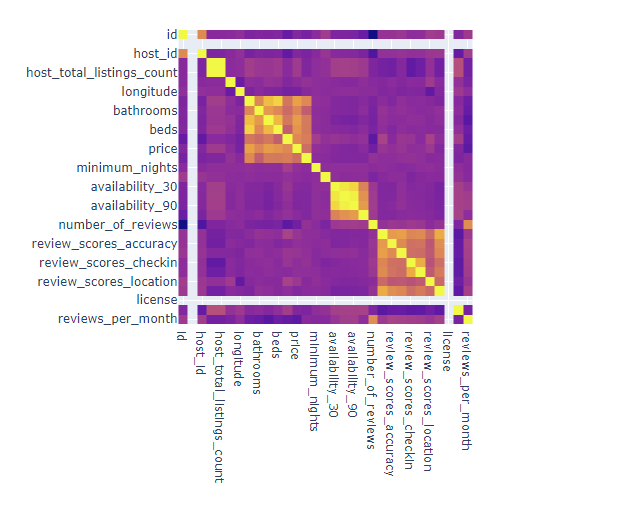

#### Is there a relationship between location and review_scores_rating?

In [203]:
#interactive heatmap plot using latitude, longitude
fig = go.Figure(go.Densitymapbox(lat=df_list.latitude, lon=df_list.longitude, z=df_list.review_scores_rating,
                                 radius=10,colorscale="Rainbow"))
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(width=1200, height=800)
fig.show(renderer='iframe')

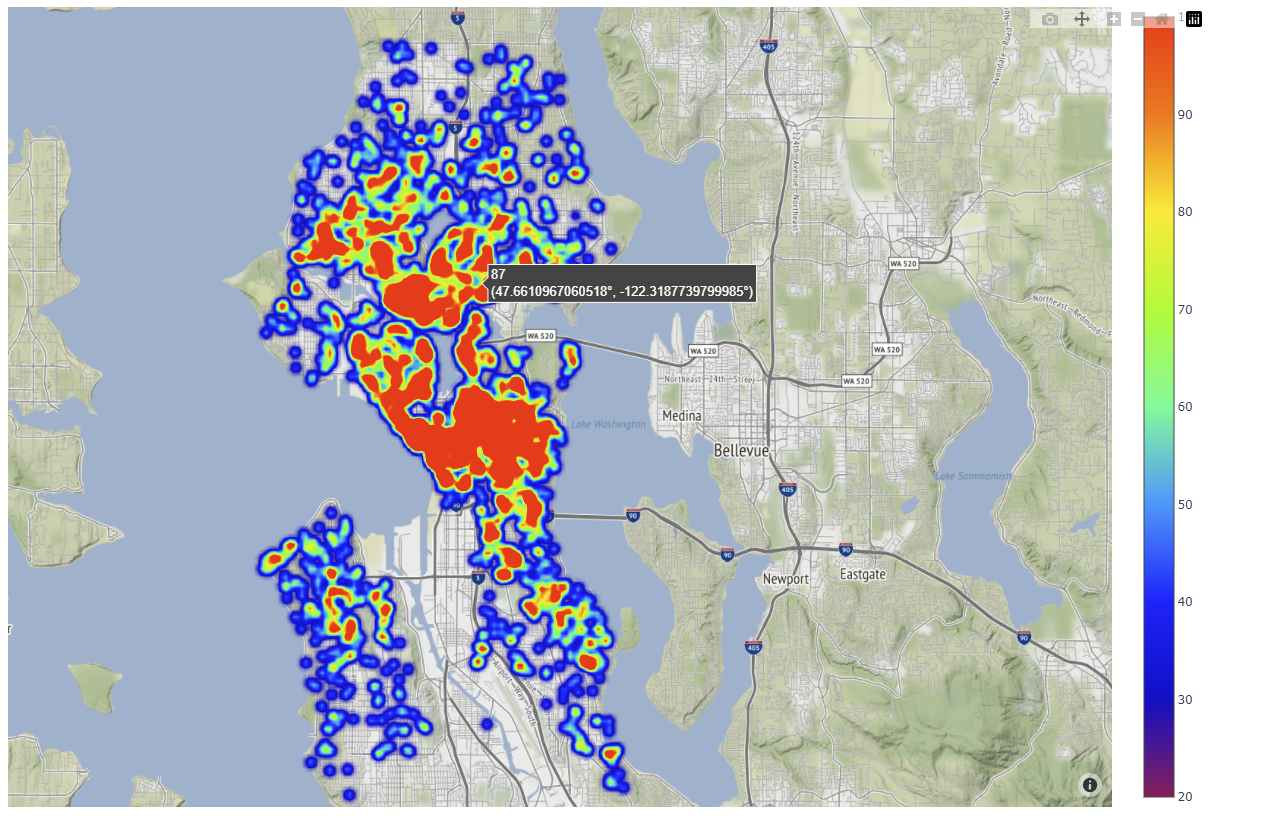

#### From looking at the heatmap, it does not seem so (although most airbnbs properties are concentrated in one location)
#### What about reviews_per_month?

In [204]:
fig = go.Figure(go.Densitymapbox(lat=df_list.latitude, lon=df_list.longitude, z=df_list.reviews_per_month,
                                 radius=10,colorscale="Rainbow"))
fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(width=1200, height=800)
fig.show(renderer='iframe')

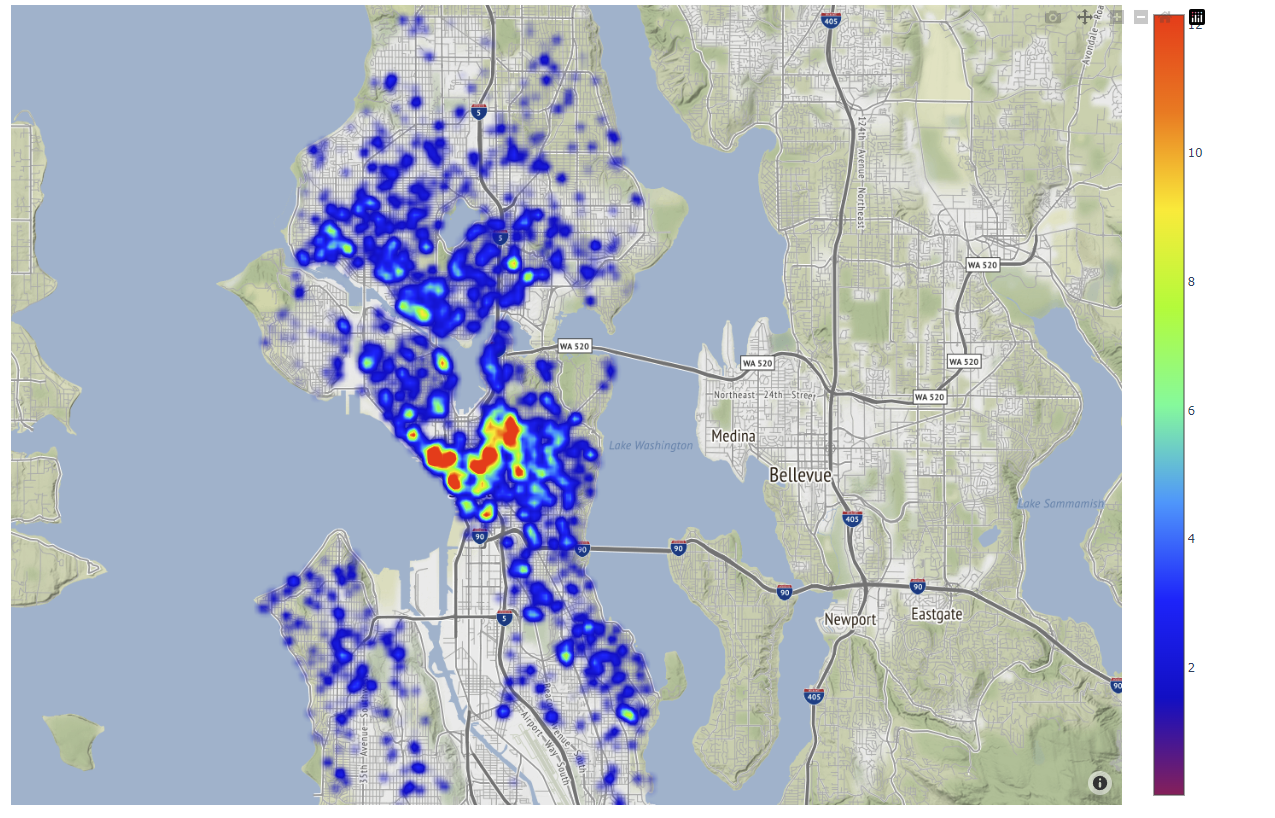

#### This absolutely shows where most people book their arbnbs (assuming that leaving a review is proportionate to booking). can we provide a geonet for this?

In [205]:
fig = px.histogram(df_list,x="latitude",y="reviews_per_month",nbins=60,marginal="violin")
fig.show(renderer='iframe')

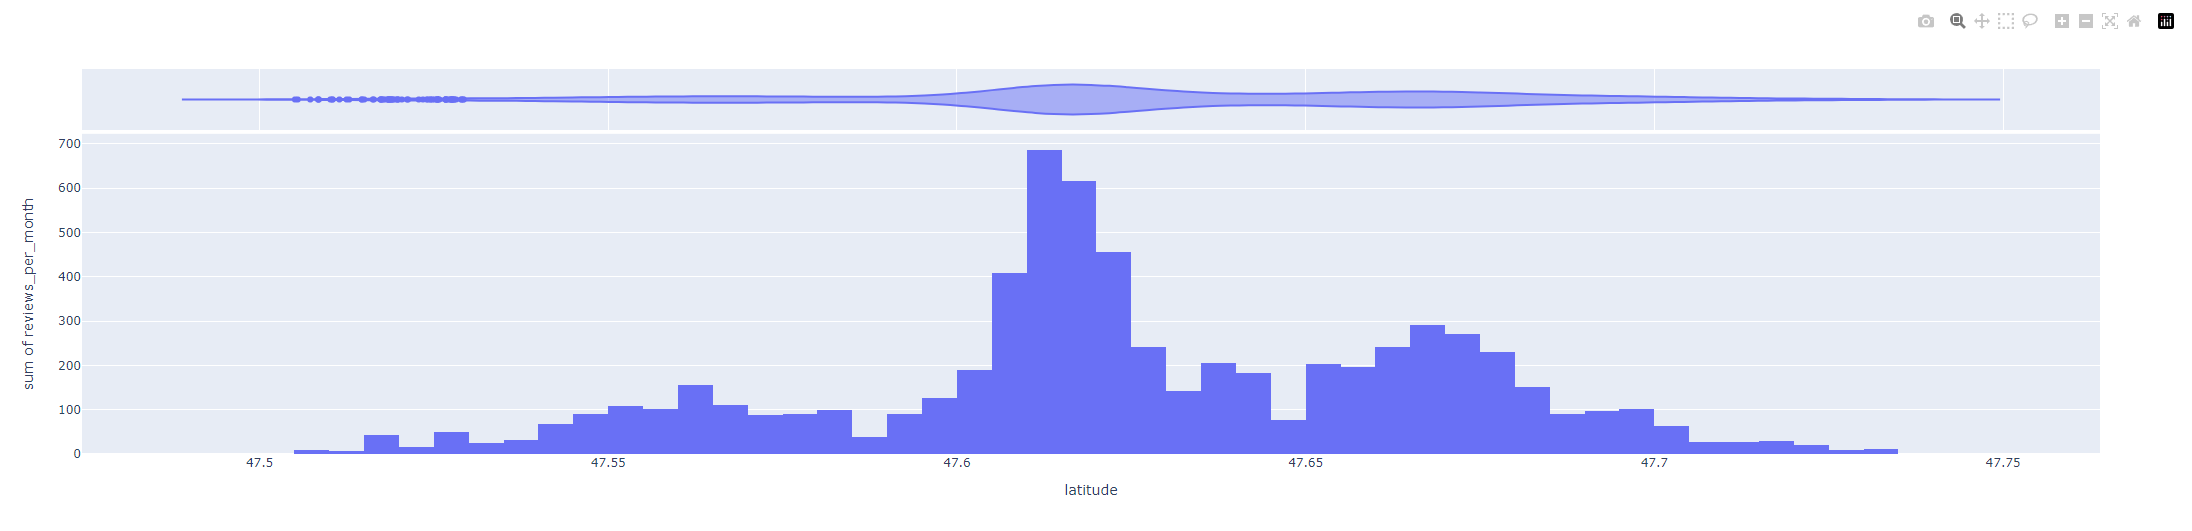

In [206]:
fig = px.histogram(df_list,x="longitude",y="reviews_per_month",nbins=60,marginal="violin")
fig.show(renderer='iframe')

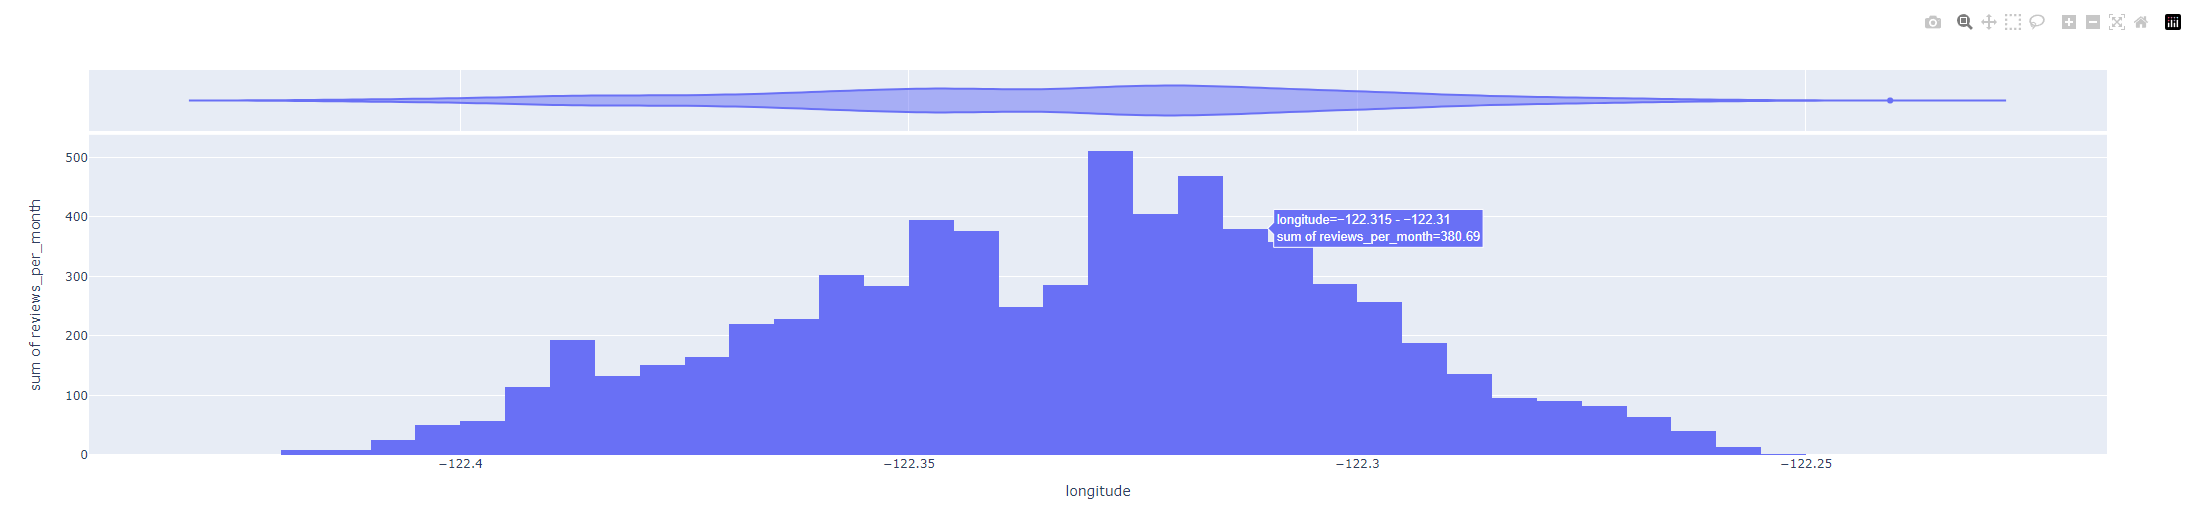

In [207]:
#find X % bounds for both?
#TODO: Do this right
#for now, just using the graphs and rough values
lat_bounds = [47.595,47.625]
lon_bounds = [-122.365,-122.31]
mask = ((df_list["latitude"] > lat_bounds[0]) & (df_list["latitude"] < lat_bounds[1]) & (df_list["longitude"] > lon_bounds[0]) & (df_list["longitude"] < lon_bounds[1]))

In [208]:
#create new feature if in densest review area
df_list.loc[mask,"in_hotspot"] = True
df_list.in_hotspot.fillna(value=False,inplace=True)
df_list.in_hotspot.value_counts()

False    2810
True     1008
Name: in_hotspot, dtype: int64

In [209]:
print(((1008/3818)*100), "% of Seattle properties are in our hotspot")

26.401257202723937 % of Seattle properties are in our hotspot


In [210]:
# do locations within our geonet differ on average review score?
in_hotspot_review_mean = df_list[df_list["in_hotspot"] == True].review_scores_rating.mean()
other_review_mean = df_list[df_list["in_hotspot"] == False].review_scores_rating.mean()
print(in_hotspot_review_mean, other_review_mean)

94.02718676122932 94.72559139784946


##### does not appear so. what about price?

In [211]:
#calculate means
in_hotspot_price_mean = df_list[df_list["in_hotspot"] == True].price.mean()
other_price_mean = df_list[df_list["in_hotspot"] == False].price.mean()
print(in_hotspot_price_mean, other_price_mean)

138.57638888888889 124.17366548042705


#### The average price in our 'hotspot' is higher than that of properties outside of it. However, review ratings are within ~1% of each other. does the std show higher variance?

In [212]:
#stdev for price and review score rating
in_hotspot = df_list["in_hotspot"] == True
out_hotspot = df_list["in_hotspot"] == False
print("rating in hotspot stdev:", df_list[in_hotspot].review_scores_rating.std())
print("rating out of hotspot stdev:", df_list[out_hotspot].review_scores_rating.std())
print("price in hotspot stdev:", df_list[in_hotspot].price.std())
print("price out of hotspot stdev:", df_list[out_hotspot].price.std())

rating in hotspot stdev: 7.353329134101649
rating out of hotspot stdev: 6.303665549476
price in hotspot stdev: 80.63171709349507
price out of hotspot stdev: 93.17935799238136


#### So, we can conclude:
##### Location is not a meaningful indicator of rating, but can be an indicator of price
##### There is higher variance in user ratings of properties in our 'hotspot', even though higher reviews/month would suggest lower (this could be due to variance in reviewer expectations)
##### If looking to buy a property for an airbnb, this can provide insight into what properties will yield the highest return + most bookings

#### Can we build a naive model to predict price?

In [217]:
df_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [215]:
# cleaning data
# fix bad zip code, remove nan, convert all to int
df_list.dropna(subset=["zipcode"],inplace=True)
df_list["zipcode"] = df_list.zipcode.replace("99\n98122","98122")
def str_to_int(x):
    '''
    replace all str with int.
    '''
    return int(x)
df_list["zipcode"] = df_list.zipcode.apply(str_to_int)

In [216]:
#list of categorical to get dummies for
categoricals = ['require_guest_phone_verification', 'instant_bookable', 'in_hotspot']
df_list = pd.get_dummies(df_list,columns=categoricals)

In [218]:
#given that nans are a low percentage of data, i feel okay dropping them
df_list = df_list.dropna(subset=['zipcode', 'latitude', 'longitude', 'reviews_per_month', 'require_guest_phone_verification_f',
       'require_guest_phone_verification_t', 'instant_bookable_f',
       'instant_bookable_t','in_hotspot_False', 'in_hotspot_True'])

In [219]:
X = df_list[['zipcode', 'latitude', 'longitude', 'reviews_per_month', 'require_guest_phone_verification_f',
       'require_guest_phone_verification_t', 'instant_bookable_f',
       'instant_bookable_t','in_hotspot_False', 'in_hotspot_True']]
y = df_list['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit
lm_model.fit(X_train, y_train) 


lm_model.coef_

array([-1.24612661e-01, -2.65494660e+01, -3.01805368e+02, -1.16505387e+01,
       -5.41846889e+00,  5.41846889e+00, -2.23477026e+00,  2.23477026e+00,
       -8.84015698e+00,  8.84015698e+00])

In [220]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

est_int       coefs   abs_coefs
2                           longitude -301.805368  301.805368
1                            latitude  -26.549466   26.549466
3                   reviews_per_month  -11.650539   11.650539
8                    in_hotspot_False   -8.840157    8.840157
9                     in_hotspot_True    8.840157    8.840157
4  require_guest_phone_verification_f   -5.418469    5.418469
5  require_guest_phone_verification_t    5.418469    5.418469
6                  instant_bookable_f   -2.234770    2.234770
7                  instant_bookable_t    2.234770    2.234770
0                             zipcode   -0.124613    0.124613

##### Longitude has a high correlation with price. The farther West within Seattle the property is, the more it can be charged for.
##### Other features considered have weak correlations.